# Compute a single map from runs 7430 to 7433

### Author:  JJGC

### Software: KrCalib : https://github.com/nextic/ICAROS/

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Wed Aug 21 16:00:16 2019


### Logger

In [2]:
import logging


logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

logging.info('Hello world!')


2019-08-21 16:00:17,914 | INFO : Hello world!


### Input files

In [171]:
from krcal.core.kr_types import KrFileName
input_path  = f"$IC_DATA/dst"
output_path = f"$IC_DATA/ldst"
map_path    = f"$IC_DATA/maps"

run_i = 7430
run_f = 7433

input_file_names  = ['dst_7430_trigger1_0000_7615.h5',
                     'dst_7431_trigger1_0000_9066.h5',
                     'dst_7432_trigger1_0000_9095.h5',
                     'dst_7433_trigger1_0000_8920.h5']

time_bins = 20
xybins    = 100
output_file_name  = ' '
map_file_name     = f'kr_maps_xy_{run_i}_{run_f}.h5'
map_file_name_ts  = f'kr_maps_rphi_5_8_ts_{time_bins}_{run_i}_{run_f}.h5'
emap_filename     = f'kr_emap_xy_{xybins}_{xybins}_r_{run_i}_{run_f}.h5'


krfn = KrFileName(input_file_names,
                  output_file_name,
                  map_file_name,
                  map_file_name_ts,
                  emap_filename)

### Notebook configuration

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [173]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import tables            as tb
import random
import glob
import warnings
sns.set()

In [45]:
from  invisible_cities.io.dst_io              import load_dsts
from  invisible_cities.io.dst_io              import load_dst
from  invisible_cities.core .core_functions   import in_range
from  invisible_cities.core.system_of_units_c import units
import invisible_cities.reco.corrections      as corrf

In [46]:
import krcal.dev.corrections                  as corrections 
import krcal.utils.hst_extend_functions       as hst
from krcal.core import fit_functions_ic       as fitf
import invisible_cities.reco.corrections      as corrf

In [47]:
from krcal.core.io_functions       import filenames_from_paths
from krcal.core.io_functions       import filenames_from_list
from krcal.core.io_functions       import kdst_write
from krcal.core.io_functions       import write_maps
from krcal.core.io_functions       import read_maps
from krcal.core.io_functions       import write_maps_ts
from krcal.core.io_functions       import read_maps_ts


In [48]:
from krcal.core.ranges_and_bins_functions     import kr_ranges_and_bins
from krcal.core.histo_functions               import h1, h1d, h2, h2d, profile1d, plot_histo
from krcal.core.kr_types                      import PlotLabels, FitType


In [9]:
from krcal.core.core_functions      import time_delta_from_time
from krcal.core.core_functions      import phirad_to_deg
from krcal.core.core_functions      import NN
from krcal.core.core_functions      import timeit
from krcal.core.core_functions      import data_frames_are_identical
from krcal.core                     import fit_functions_ic as fitf

In [10]:
from krcal.core.plt_functions  import plot_sector
from krcal.core.plt_functions  import plot_sectors

In [11]:
from krcal.core.stat_functions      import mean_and_std

In [38]:
from krcal.core.selection_functions           import event_map_df
from krcal.core.selection_functions           import select_rphi_sectors_df
from krcal.core.selection_functions           import select_xy_sectors_df
from krcal.core.selection_functions           import get_time_series_df
from krcal.core.selection_functions           import selection_info
from krcal.core.selection_functions           import selection_in_band
from krcal.core.selection_functions           import plot_selection_in_band

from krcal.core.fitmap_functions              import time_fcs_df
from krcal.core.fitmap_functions              import fit_fcs_in_rphi_sectors_df
from krcal.core.fitmap_functions              import fit_map_xy_df

from krcal.core.map_functions                 import tsmap_from_fmap
from krcal.core.map_functions                 import amap_from_tsmap
from krcal.core.map_functions                 import relative_errors
from krcal.core.map_functions                 import amap_average
from krcal.core.map_functions                 import amap_max
from krcal.core.map_functions                 import amap_min
from krcal.core.map_functions                 import amap_replace_nan_by_mean
from krcal.core.map_functions                 import amap_replace_nan_by_zero
from krcal.core.map_functions                 import regularize_maps
from krcal.core.map_functions                 import get_maps_from_tsmap
from krcal.core.map_functions                 import map_average
from krcal.core.map_functions                 import add_mapinfo

from krcal.core.xy_maps_functions             import draw_xy_maps
from krcal.core.xy_maps_functions             import draw_xy_map
from krcal.core.xy_maps_functions             import draw_xy_maps_ts

from krcal.core.rphi_maps_functions           import draw_rphi_maps
from krcal.core.rphi_maps_functions           import draw_rphi_map
from krcal.core.rphi_maps_functions           import draw_rphi_maps_ts
from krcal.core.rphi_maps_functions           import draw_wedges
from krcal.core.rphi_maps_functions           import define_rphi_sectors
from krcal.core.rphi_maps_functions           import rphi_sector_map_def

from krcal.core.correction_functions          import e0_rphi_correction
from krcal.core.correction_functions          import e0_xy_correction
from krcal.core.correction_functions          import lt_xy_correction
from krcal.core.correction_functions          import e0_xy_correction_ts
from krcal.core.correction_functions          import lt_xy_correction_ts
from krcal.core.correction_functions          import lt_rphi_correction
from krcal.core.correction_functions          import lt_rphi_correction_ts
from krcal.core.correction_functions          import e0_rphi_correction_ts
from krcal.core.correction_functions          import e0_rphi_correction_ts

from krcal.core.fit_lt_histograms             import plot_time_fcs
from krcal.core.fit_energy_functions          import fit_energy
from krcal.core.fit_energy_functions          import plot_fit_energy
from krcal.core.fit_energy_functions          import print_fit_energy
from krcal.core.fit_energy_functions          import resolution_r_z
from krcal.core.fit_energy_functions          import plot_resolution_r_z



In [13]:
from krcal.core.fit_lt_functions    import fit_lifetime
from krcal.core.fit_lt_functions    import time_fcs
from krcal.core.fit_lt_functions    import fit_fcs_in_rphi_sectors
from krcal.core.fit_lt_functions    import fit_fcs_in_xy_bin
from krcal.core.fit_lt_functions    import fit_map_rphi
from krcal.core.fit_lt_functions    import fit_map_xy
from krcal.core.fit_lt_functions    import get_time_series

In [14]:
from krcal.core.fit_lt_histograms   import histo_fit_sectors
from krcal.core.fit_lt_histograms   import print_fit_sectors_pars
from krcal.core.fit_lt_histograms   import plot_fit_sectors
from krcal.core.fit_lt_histograms   import plot_fit_xy
from krcal.core.fit_lt_histograms   import plot_time_fcs
from krcal.core.fit_lt_histograms   import plot_fit_lifetime_and_chi2
from krcal.core.fit_lt_histograms   import print_fit_lifetime

In [15]:
from krcal.core.fit_energy_functions    import fit_energy
from krcal.core.fit_energy_functions    import plot_fit_energy
from krcal.core.fit_energy_functions    import print_fit_energy
from krcal.core.fit_energy_functions    import resolution_r_z
from krcal.core.fit_energy_functions    import plot_resolution_r_z

In [16]:
from krcal.core.kr_types import PlotLabels, KrEvent, ASectorMap
from krcal.core.kr_types import FitType, KrSector, MapType
from krcal.core.kr_types import KrFileName


In [17]:
from krcal.core.rphi_maps_functions   import draw_rphi_maps
from krcal.core.rphi_maps_functions   import draw_rphi_map
from krcal.core.rphi_maps_functions   import draw_rphi_maps_ts
from krcal.core.rphi_maps_functions   import draw_wedges
from krcal.core.rphi_maps_functions   import define_rphi_sectors
from krcal.core.rphi_maps_functions   import rphi_sector_map_def

In [18]:
from krcal.core.map_functions   import tsmap_from_fmap
from krcal.core.map_functions   import amap_from_tsmap
from krcal.core.map_functions   import relative_errors
from krcal.core.map_functions   import amap_valid_mask
from krcal.core.map_functions   import amap_valid_fraction
from krcal.core.map_functions   import amap_average
from krcal.core.map_functions   import amap_max
from krcal.core.map_functions   import amap_min
from krcal.core.map_functions   import amap_replace_nan_by_mean
from krcal.core.map_functions   import amap_replace_nan_by_zero
from krcal.core.map_functions   import regularize_maps
from krcal.core.map_functions   import get_maps_from_tsmap
from krcal.core.map_functions   import map_average

In [19]:
from krcal.core.xy_maps_functions   import draw_xy_maps
from krcal.core.xy_maps_functions   import draw_xy_map
from krcal.core.xy_maps_functions   import draw_xy_maps_ts

In [20]:
from krcal.core.s1s2_functions  import energy_time_profile
from krcal.core.s1s2_functions  import energy_X_profile

In [21]:
from krcal.core.correction_functions import e0_rphi_correction
from krcal.core.correction_functions import e0_xy_correction
from krcal.core.correction_functions import lt_xy_correction
from krcal.core.correction_functions import e0_xy_correction_ts
from krcal.core.correction_functions import lt_xy_correction_ts
from krcal.core.correction_functions import lt_rphi_correction
from krcal.core.correction_functions import lt_rphi_correction_ts
from krcal.core.correction_functions import e0_rphi_correction_ts

In [23]:
from numpy import pi, sqrt

In [24]:
from typing      import List, Tuple, Dict, Sequence, Iterable

In [25]:
from ipywidgets import interact, interactive, fixed
from IPython.display import display

### Logger


- CRITICAL
- ERROR
- WARNING
- INFO
- DEBUG



In [26]:
log = logging.getLogger()

### Input/output 

In [174]:
fn =filenames_from_list(krfn, input_path, output_path, map_path)

In [175]:
fn

KrFileName(input_file_names=['/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_7430_trigger1_0000_7615.h5', '/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_7431_trigger1_0000_9066.h5', '/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_7432_trigger1_0000_9095.h5', '/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_7433_trigger1_0000_8920.h5'], output_file_name='/Users/jjgomezcadenas/Projects/ICDATA/ldst/ ', map_file_name='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_maps_xy_7430_7433.h5', map_file_name_ts='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_maps_rphi_5_8_ts_20_7430_7433.h5', emap_file_name='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_emap_xy_100_100_r_7430_7433.h5')

In [176]:
def load_dsts(dst_list, group, node):
    dsts = [load_dst(filename, group, node) for filename in dst_list]
    return pd.concat(dsts, ignore_index=True)


In [177]:
dst           = load_dsts(fn.input_file_names, "DST", "Events")

In [178]:
unique_events = ~dst.event.duplicated()
number_of_evts_full = np.count_nonzero(unique_events)

print(f"Total number of events: {len(dst)}")

Total number of events: 1833789


In [179]:
dst.head()

,index,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,...,Z,Zrms,X,Y,R,Phi,Xrms,Yrms,E0,E
0,2,2,1.565276e+09,0,0,1,1,125.0,2.173434,7.521394,...,373.881958,1.901097,146.720090,7.963220,146.936033,0.054222,9.697072,9.861699,12156.770562,12924.308246
1,10,15,1.565276e+09,0,0,1,1,425.0,0.874476,10.297514,...,260.050568,1.556588,-4.459044,-134.780043,134.853784,-1.603868,10.056039,11.245365,12146.150316,12676.166465
2,15,21,1.565276e+09,0,0,1,1,250.0,0.852809,6.603673,...,160.810440,1.257667,24.829080,-37.860246,45.275616,-0.990348,8.349519,7.781161,12257.811442,12532.292743
3,16,22,1.565276e+09,0,0,1,1,325.0,3.652303,21.043337,...,480.764099,2.093034,98.101895,134.563100,166.526904,0.940845,9.169067,10.539603,11620.957543,12626.921145
4,43,38,1.565276e+09,0,0,1,1,275.0,2.195430,10.667283,...,22.795752,0.572101,86.262573,54.622085,102.101928,0.564479,8.359329,8.043520,12738.335121,12827.149923


In [180]:
dst.tail()

,index,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,...,Z,Zrms,X,Y,R,Phi,Xrms,Yrms,E0,E
1833784,298,2723912,1.565609e+09,0,0,1,1,200.0,2.131133,11.569408,...,529.359436,2.310898,86.431352,58.851555,104.565215,0.597795,12.663655,11.351864,11463.072688,12454.833739
1833785,299,2723914,1.565609e+09,0,0,1,1,175.0,1.743083,8.354533,...,415.714569,2.092594,43.349935,64.023394,77.318897,0.975609,8.616069,8.024163,12252.095351,13068.420475
1833786,311,2721641,1.565609e+09,0,0,1,1,175.0,3.488876,15.655026,...,363.443878,2.014812,-170.040035,-17.565138,170.944867,-3.038658,9.547148,9.516328,12024.802859,12985.276002
1833787,333,2721661,1.565609e+09,0,0,1,1,350.0,2.030200,13.149873,...,50.945938,0.754964,58.814020,-23.092462,63.185052,-0.374141,8.088892,7.425621,12570.867025,12734.464093
1833788,349,2721675,1.565609e+09,0,0,1,1,150.0,2.584803,10.025852,...,380.681824,1.899663,-101.760508,-78.512976,128.528162,-2.484444,16.248436,10.105569,11904.653352,12626.194439


In [181]:
dst.index

RangeIndex(start=0, stop=1833789, step=1)

### Ranges and binning

In [182]:
RMAX      = 200
RFID      = 180
RCORE     = 100
s1e_range = (3, 25)
s2e_range = (2000, 20000)
s2q_range = (100, 1000)

xy_range  = (-RMAX,  RMAX)
z_range   = (10,  550)
e_range   = s2e_range
lt_range  = (1000, 11000)
c2_range  = (0,5)
time_bins = 1

In [183]:
krTimes, krRanges, krNbins, krBins = kr_ranges_and_bins(dst,
                                                        xxrange   = xy_range,
                                                        yrange    = xy_range,
                                                        zrange    = z_range,
                                                        s2erange  = s2e_range,
                                                        s1erange  = s1e_range,
                                                        s2qrange  = s2q_range,
                                                        xnbins    = xybins,
                                                        ynbins    = xybins,
                                                        znbins    = 15,
                                                        s2enbins  = 25,
                                                        s1enbins  = 10,
                                                        s2qnbins  = 25,
                                                        tpsamples = 3600) # tsamples in seconds

In [184]:
krRanges

KrRanges(S2e=(2000, 20000), S1e=(3, 25), S2q=(100, 1000), X=(-200, 200), Y=(-200, 200), Z=(10, 550), T=(1565275938.9490001, 1565608644.024))

In [185]:
krNbins

KrNBins(S2e=25, S1e=10, S2q=25, X=100, Y=100, Xsi=50, Ysi=50, Z=15, T=92)

In [186]:
dstx     = dst[in_range(dst.X, -RMAX, RMAX)]
dst      = dstx[in_range(dstx.Y, -RMAX, RMAX)]
dst_time = dst.sort_values('time')
T       = dst_time.time.values
DT      = time_delta_from_time(T)
dst = dst.assign(DT=DT)
dst.columns

Index(['index', 'event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w',
       'S1h', 'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT',
       'Z', 'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms', 'E0', 'E'],
      dtype='object')

In [187]:
dst.DT.head()

0    0.000
1    0.434
2    0.522
3    0.538
4    1.266
Name: DT, dtype: float64

In [188]:
dst.DT.tail()

1833784    332704.417
1833785    332704.713
1833786    332704.832
1833787    332705.029
1833788    332705.075
Name: DT, dtype: float64

### Time 

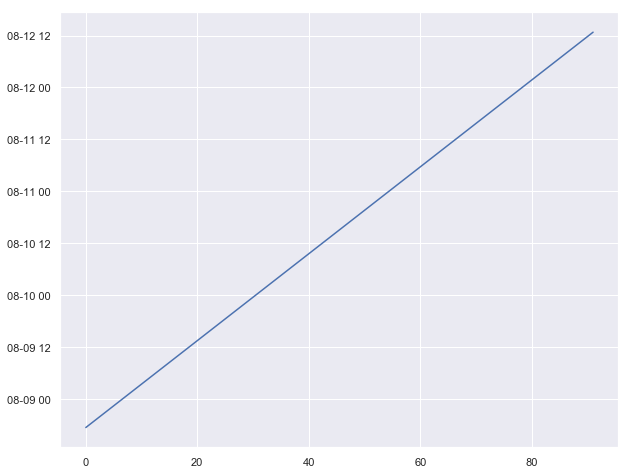

In [189]:
plt.plot(krTimes.timeStamps)

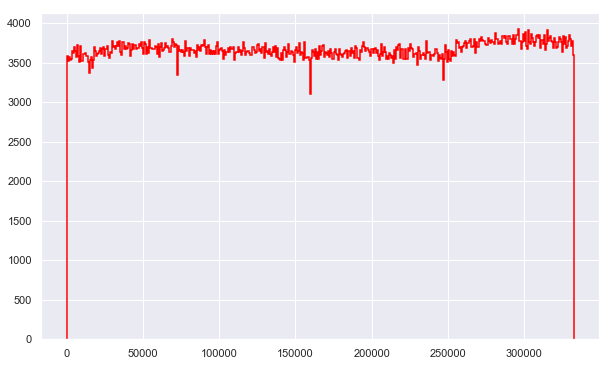

In [190]:
fig = plt.figure(figsize=(10,6))
ax      = fig.add_subplot(1, 1, 1)
(_)    = h1(dst.DT.values, bins=500, range = (dst.DT.values[0], dst.DT.values[-1]), color='red', stats=False, lbl='pre-sel')

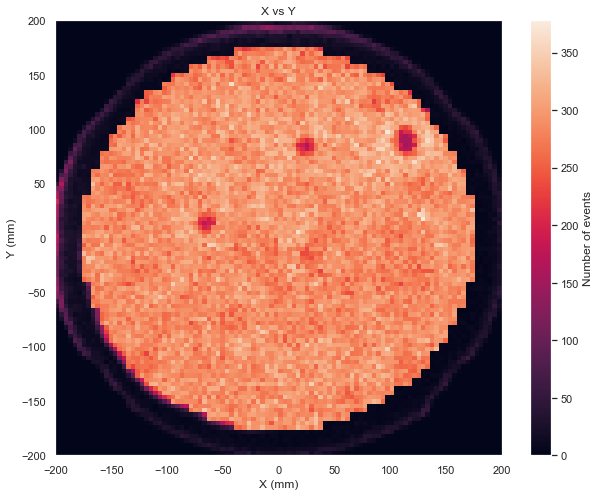

In [191]:
nevt = h2d(dst.X, dst.Y, krNbins.X, krNbins.Y, (-200,200), (-200,200), 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y'),
           profile=False,
           figsize=(10,8))

## Time series

In [192]:
time_bins = 8
ti = timeit(get_time_series_df)
ts, masks = ti(time_bins, (DT[0],DT[-1]), dst)
ts

Time spent in get_time_series_df: 0.07631421089172363 s


array([ 20794.06718749,  62382.20156246, 103970.33593744, 145558.47031242,
       187146.60468739, 228734.73906237, 270322.87343735, 311911.00781232])

In [193]:
ti = timeit(time_fcs_df)
fps = ti(ts, masks, dst, 
         nbins_z = 15,
         nbins_e = 25,
         range_z = (10, 550),
         range_e = (7000, 18000),
         energy  = 'S2e',
         fit     = FitType.profile)

Time spent in time_fcs_df: 0.5007059574127197 s


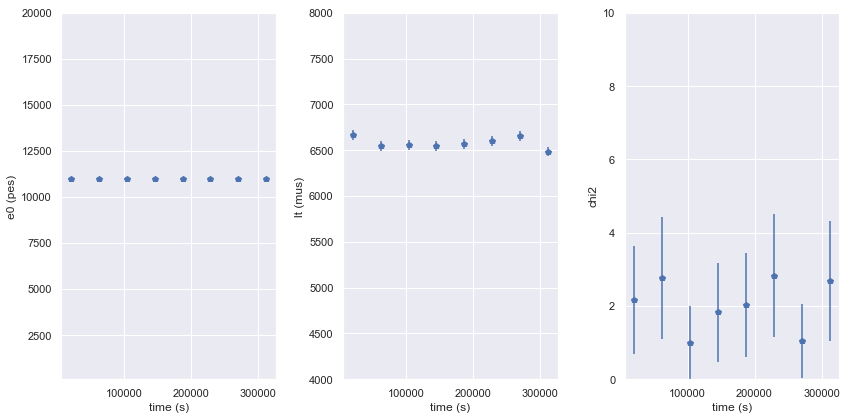

In [194]:
plot_time_fcs(fps,
              range_chi2  = (0,10),
              range_e0    = (100,20000),
              range_lt    = (4e+3, 8e+3),
              figsize     = (12,6))

### Reasonably flat lifetime, make a combined map

# XY map

In [195]:
ti = timeit(select_xy_sectors_df)
KXY = ti(dst, krBins.X, krBins.Y)

Time spent in select_xy_sectors_df: 12.747200012207031 s


In [196]:
nXY = event_map_df(KXY)

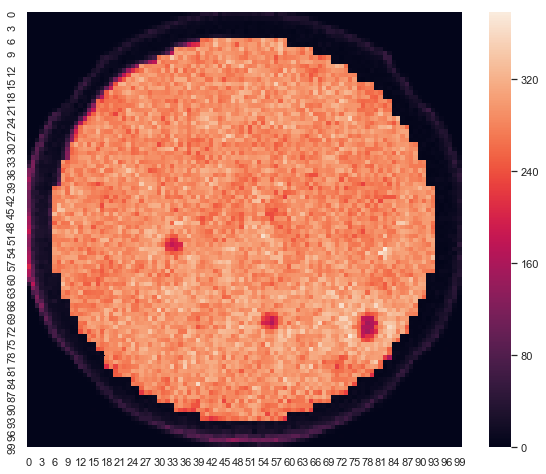

In [197]:
ax = sns.heatmap(nXY, square=True)

In [198]:
ti = timeit(fit_map_xy_df)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fmxy = ti(selection_map = KXY,
              event_map      = nXY,
              n_time_bins    = 1,
              time_diffs     = DT,
              nbins_z        = krNbins.Z, 
              nbins_e        = krNbins.S2e, 
              range_z        = z_range, 
              range_e        = e_range,
              energy         = 'S2e',
              z              = 'Z',
              fit            = FitType.unbined,
              n_min          = 100)

Time spent in fit_map_xy_df: 22.02568006515503 s


In [199]:
ti = timeit(tsmap_from_fmap)
tsm = ti(fmxy)

Time spent in tsmap_from_fmap: 0.006494045257568359 s


In [200]:
am = amap_from_tsmap(tsm, 
                     ts = 0, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)

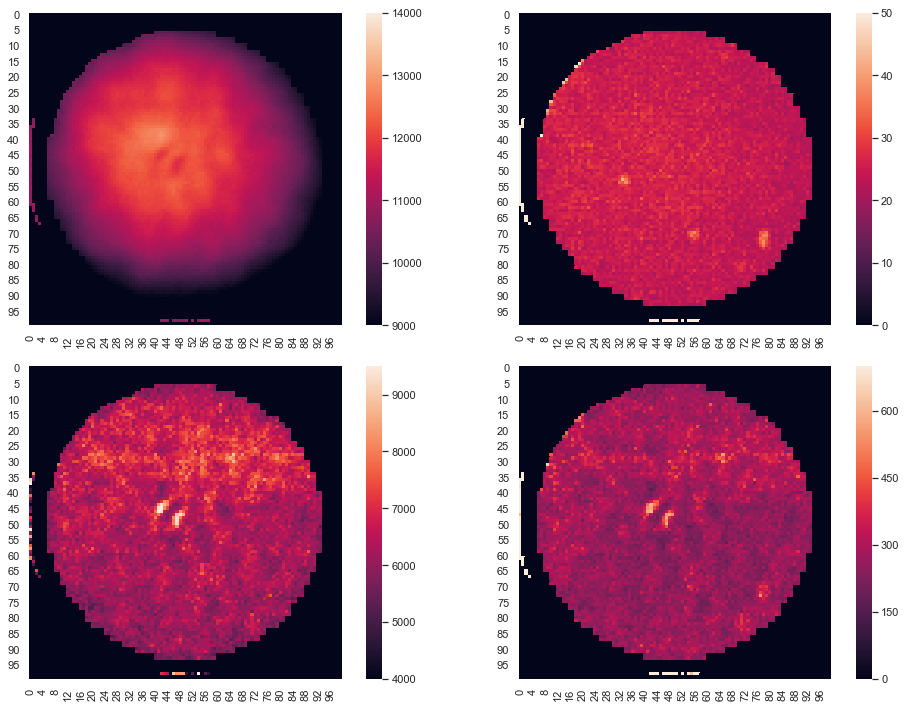

In [201]:
draw_xy_maps(am,
            e0lims  = (9000, 14000),
            ltlims  = (4000, 9500),
            eulims  = (0.0,  50),
            lulims  = (0, 700),
            figsize=(14,10))

In [202]:
amap_average(am) 

ASectorMap(chi2=1.0235369268178078, e0=10836.924703945744, lt=6429.959699662701, e0u=28.43077460542288, ltu=343.5482650610775, mapinfo=None)

In [203]:
rmap = regularize_maps(am, erange=e_range, ltrange=lt_range)

2019-08-21 18:16:35,312 | INFO :  set nans to average value of interval = 11000.0
2019-08-21 18:16:35,483 | INFO :  set nans to average value of interval = 6000.0


In [204]:
amap_average(rmap)

ASectorMap(chi2=1.0235369268178078, e0=10836.924703945744, lt=6429.959699662701, e0u=28.43077460542288, ltu=343.5482650610775, mapinfo=None)

In [205]:
asm = relative_errors(rmap)

In [206]:
amv = amap_average(asm)
amv

ASectorMap(chi2=1.0235369268178078, e0=10836.924703945744, lt=6429.959699662701, e0u=0.26329403052788186, ltu=5.322254050696583, mapinfo=None)

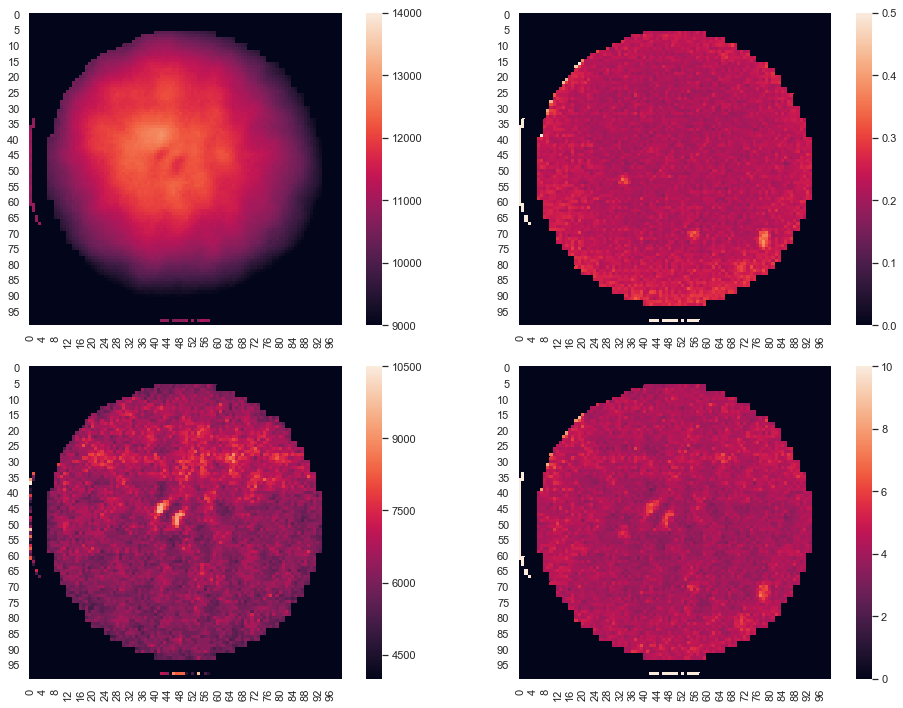

In [207]:
draw_xy_maps(asm,
            e0lims  = (9000, 14000),
            ltlims  = (4000, 10500),
            eulims  = (0.0,  0.5),
            lulims  = (0, 10),
            figsize=(14,10))

## Notice the two bright spots in the center of the chamber!

## Write maps

In [208]:
asmAv = amap_replace_nan_by_mean(asm, amMean=amv)
amap_average(asmAv)

ASectorMap(chi2=0.9681085692778063, e0=10921.273893592755, lt=6455.169452422118, e0u=0.2460815992458825, ltu=4.8011499583605834, mapinfo=None)

In [209]:
asm = add_mapinfo(asmAv, krRanges.X, krRanges.Y, krNbins.X, krNbins.Y, run_number=f'{run_i}_{run_f}')

In [210]:
asm.mapinfo

xmin               -200
xmax                200
ymin               -200
ymax                200
nx                  100
ny                  100
run_number    7430_7433
dtype: object

In [211]:
print(f'writing emaps in {emap_filename}')
write_maps(asm, filename=emap_filename)

writing emaps in kr_emap_xy_100_100_r_7430_7433.h5


/Users/jjgomezcadenas/miniconda/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->values] [items->None]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


## Read back and check resolution

In [212]:
emaps = read_maps(filename=emap_filename)

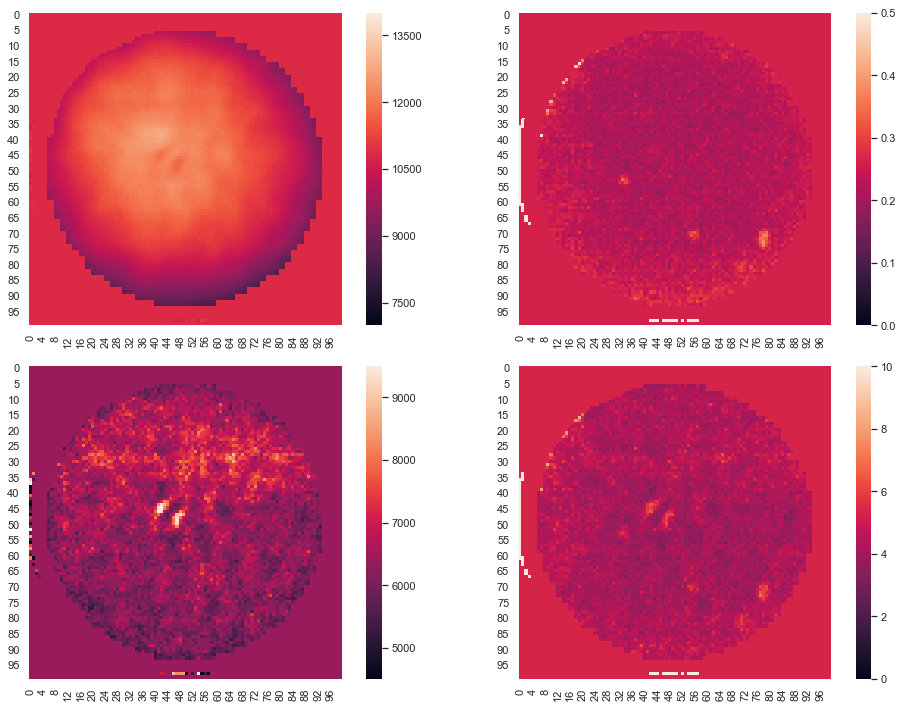

In [213]:
draw_xy_maps(emaps,
            e0lims  = (7000, 14000),
            ltlims  = (4500, 9500),
            eulims  = (0.0,  0.5),
            lulims  = (0, 10),
            figsize=(14,10))

In [214]:
amap_average(emaps)

ASectorMap(chi2=0.9681085692778063, e0=10921.273893592755, lt=6455.169452422118, e0u=0.2460815992458825, ltu=4.8011499583605834, mapinfo=None)

In [215]:
norm = amap_max(emaps)
norm

ASectorMap(chi2=18.533053537061125, e0=12879.994415499703, lt=10812.520926289602, e0u=1.5037650053431526, ltu=56.11640609308925, mapinfo=None)

In [216]:
ti = timeit(e0_xy_correction)
E0 = ti(dst.S2e.values,
        dst.X.values,
        dst.Y.values,
        E0M = emaps.e0 / norm.e0, 
        xr  = krRanges.X,
        yr  = krRanges.Y,
        nx  = krNbins.X, 
        ny  = krNbins.Y)

Time spent in e0_xy_correction: 16.846574068069458 s


In [217]:
ti = timeit(lt_xy_correction)
E = ti(E0, 
       dst.X.values, 
       dst.Y.values,
       dst.Z.values, 
       LTM = emaps.lt,
       xr  = krRanges.X,
       yr  = krRanges.Y,
       nx  = krNbins.X, 
       ny  = krNbins.Y)

Time spent in lt_xy_correction: 17.461499214172363 s


## Now compare the corrected energy with the new map (E) with the single-map corrected energy (E)

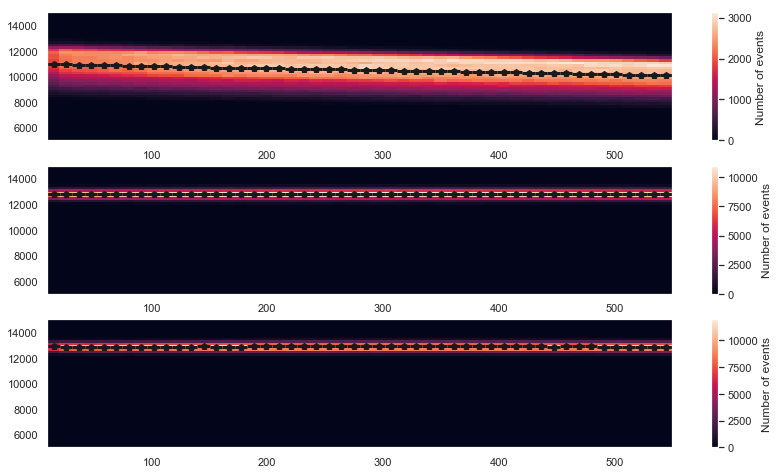

In [218]:
er = (5000,15000)
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(3, 1, 1)
nevt = h2(dst.Z, dst.S2e, 50, 50, krRanges.Z, er, 
           profile=True)
ax      = fig.add_subplot(3, 1, 2)
nevt = h2(dst.Z, dst.E, 50, 50, krRanges.Z, er, 
           profile=True)
ax      = fig.add_subplot(3, 1, 3)
nevt = h2(dst.Z, E, 50, 50, krRanges.Z, er, 
           profile=True)

## Individual correction

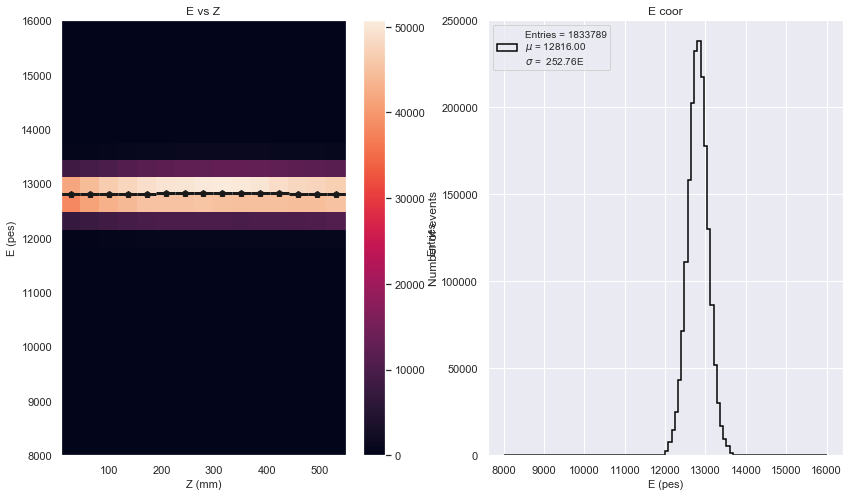

In [219]:
e_range = (8000,16000)
zrange = (10,550)
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(1, 2, 1)

nevt = h2(dst.Z, dst.E, krNbins.Z, krNbins.S2e, krRanges.Z, e_range, profile=True)
plot_histo(PlotLabels(x='Z (mm)', y='E (pes)', title='E vs Z'), ax, legend=False)

ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(dst.E,  bins = 100, range =e_range, stats=True, lbl = 'E')
plot_histo(PlotLabels('E (pes)','Entries','E coor'), ax, legendloc='upper left')

## Global map correction

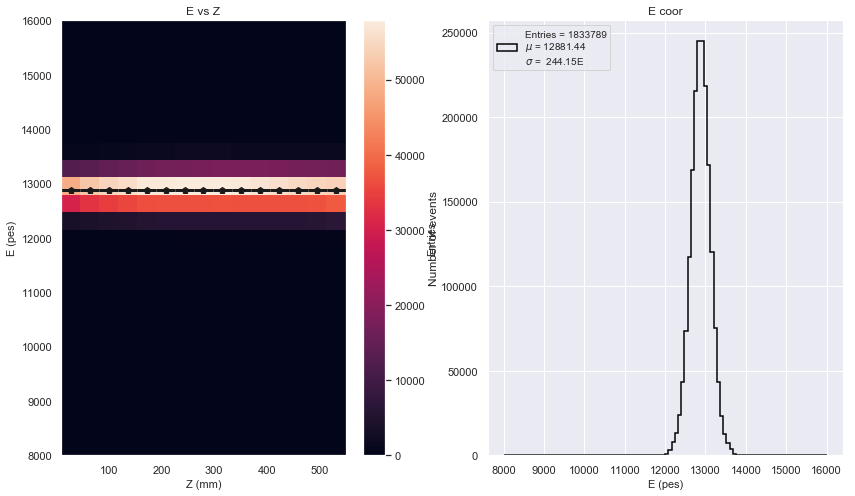

In [220]:
e_range = (8000,16000)
zrange = (10,550)
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(1, 2, 1)

nevt = h2(dst.Z, E, krNbins.Z, krNbins.S2e, krRanges.Z, e_range, profile=True)
plot_histo(PlotLabels(x='Z (mm)', y='E (pes)', title='E vs Z'), ax, legend=False)

ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(E,  bins = 100, range =e_range, stats=True, lbl = 'E')
plot_histo(PlotLabels('E (pes)','Entries','E coor'), ax, legendloc='upper left')

### Some improvement!

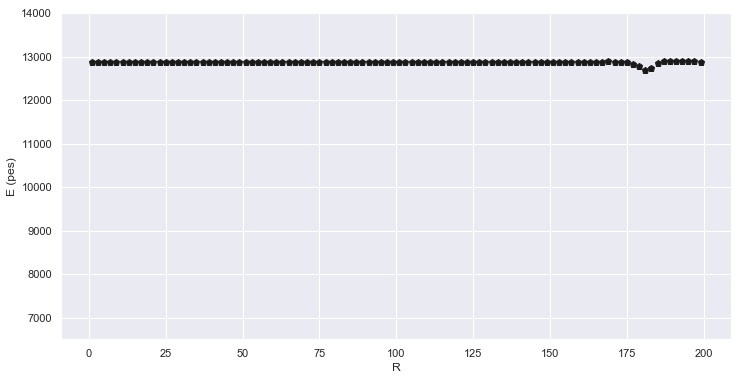

In [221]:
energy_X_profile(dst.R, E, xnbins = 100, xrange=(0,200), xlabel = 'R',
                 erange=(6500, 14000),  
                 figsize=(12,6))

In [222]:
dst = dst.assign(EC=E)

In [223]:
RFID2 = 170
dst_R     = dst[dst.R < RFID2]

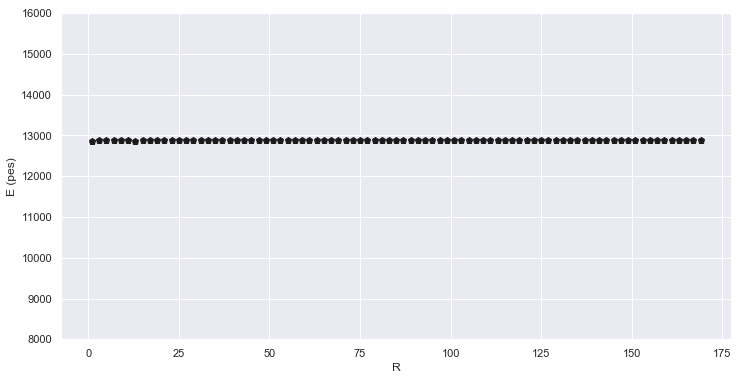

In [224]:
energy_X_profile(dst_R.R, dst_R.EC, xnbins = 100, xrange=(0,200), xlabel = 'R',
                 erange=e_range,  
                 figsize=(12,6))

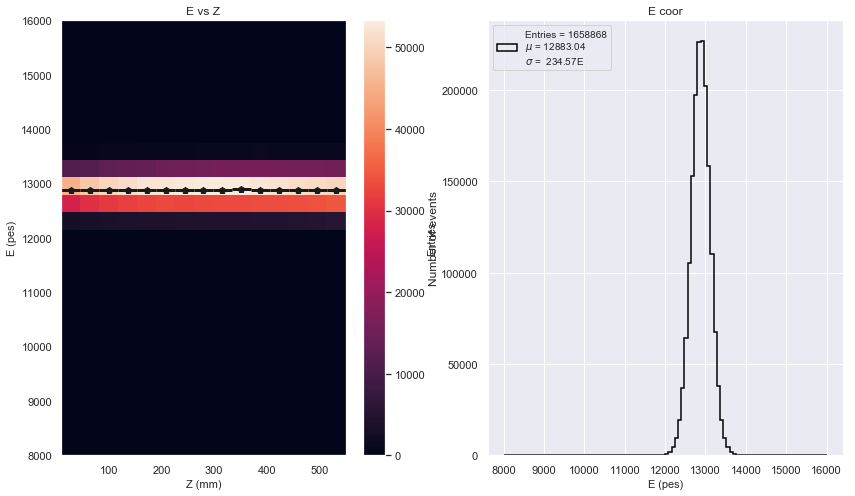

In [225]:
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(1, 2, 1)

nevt = h2(dst_R.Z, dst_R.EC, krNbins.Z, krNbins.S2e, krRanges.Z, e_range, profile=True)
plot_histo(PlotLabels(x='Z (mm)', y='E (pes)', title='E vs Z'), ax, legend=False)

ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(dst_R.EC,  bins = 100, range =e_range, stats=True, lbl = 'E')
plot_histo(PlotLabels('E (pes)','Entries','E coor'), ax, legendloc='upper left')

  Fit was valid = True
 Emu       = 12883.04800533782 +-0.1833086061418956 
 E sigma   = 232.43206968977802 +-0.14069649586062163 
 chi2    = 4.293789149200383 
 sigma E/E (FWHM)     (%) =4.23979918063385
 sigma E/E (FWHM) Qbb (%) =0.5475783586848709 


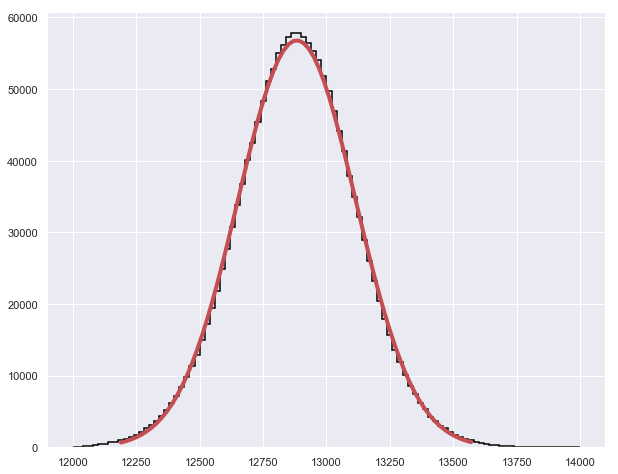

In [226]:
fc = fit_energy(dst_R.EC, nbins=100, range=(12000, 14000))
plot_fit_energy(fc)
print_fit_energy(fc)

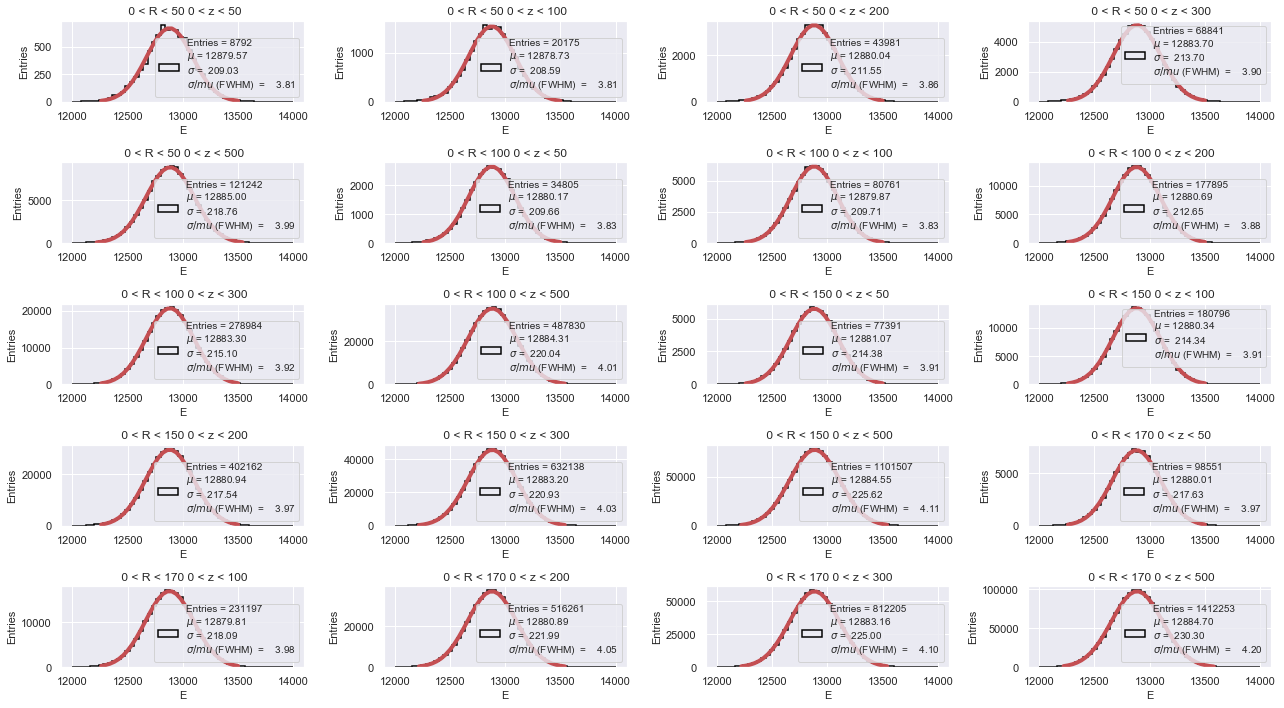

In [227]:
Ri = (50, 100,150,170)
Zi = (50, 100,200,300,500)

FC, FCE = resolution_r_z(Ri, Zi, dst_R.R, dst_R.Z, dst_R.EC,
                    enbins = 50,
                    erange = (12000,14000),
                    ixy = (5,4),
                    fdraw  = True,
                    fprint = False,
                    figsize = (18,10)) 

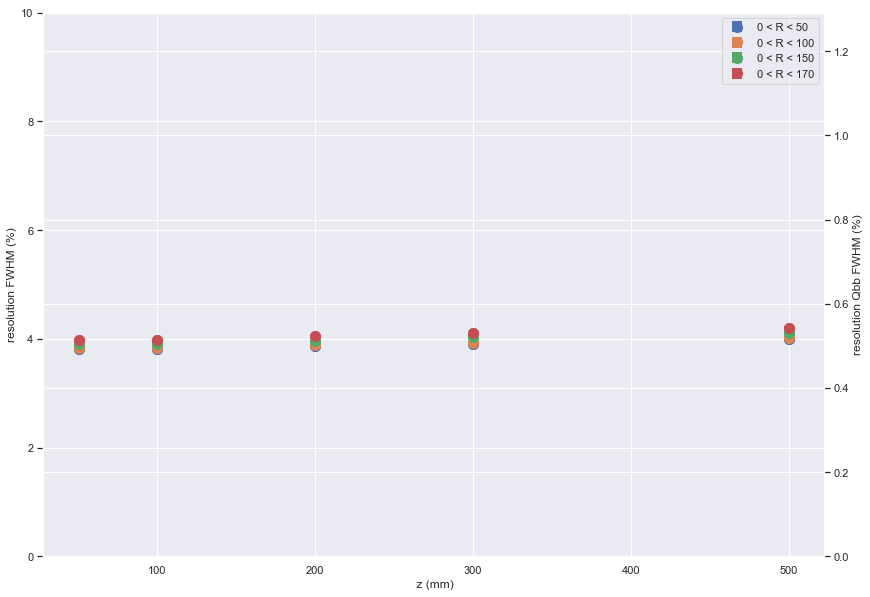

In [228]:
plot_resolution_r_z(Ri, Zi, FC, FCE, r_range=(0,10))

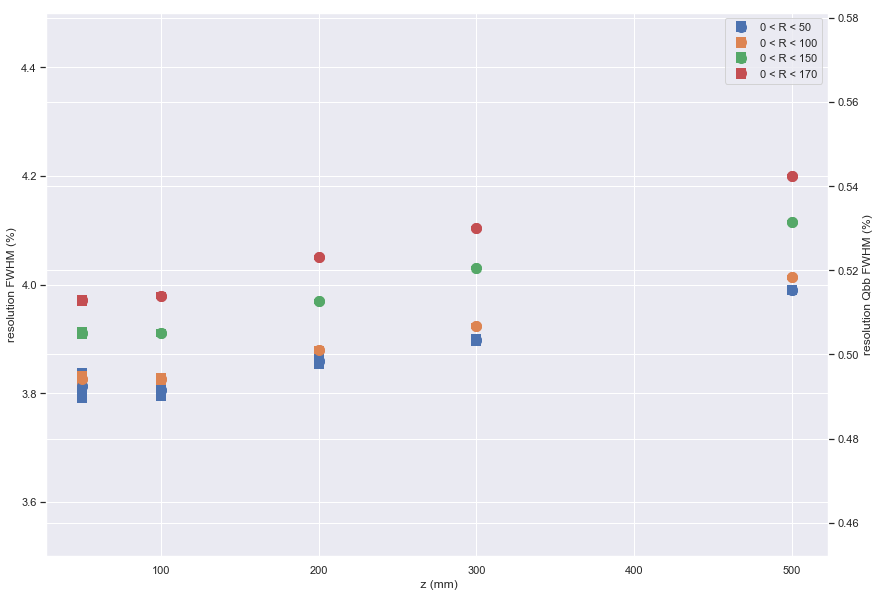

In [229]:
plot_resolution_r_z(Ri, Zi, FC, FCE, r_range=(3.5,4.5))